<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/M%C3%A9todo_de_Neville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Neville
Se utiliza para determinar un polinomio que pase por diferentes puntos $(x_0,f(x_0)),(x_1,f(x_1)),...(x_n,f(x_n))$ y así, conocer el valor aproximado de una función en un punto $x$

El método construye una tabla traingular donde cada nivel representa un polinomio de interpolación de mayor grado. Para llenar esta tabla, se utiliza la siguiente fórmula recursiva:

$P_{i,j}(x)=\frac{(x-x_{i-j})P_{i,j-1}(x)-(x-x_i)P_{i-1,j-1}(x)}{x_i-x_{i-j}}$

de aqui



*   $P_{i,0}(x) = f(x_i)$
*   $P_{i,j}(x)$ representa el polinomio interpolante de grado $j$ usando los puntos $x_{i-j},...,x_i$



A continuación, se presenta un código que realiza el método descrito anteriormente

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def neville(x_vals, y_vals):
    x = sp.symbols('x')
    n = len(x_vals)

    # Inicializar matriz triangular con ceros
    Q = [[0 for _ in range(n)] for _ in range(n)]

    # Llenar la primera columna con los valores de y
    for i in range(n):
        Q[i][0] = y_vals[i]

    # Aplicar el algoritmo de Neville
    for j in range(1, n):
        for i in range(j, n):
            xi, xij = x_vals[i], x_vals[i - j]
            Q[i][j] = ((x - xij) * Q[i][j - 1] - (x - xi) * Q[i - 1][j - 1]) / (xi - xij)
            Q[i][j] = sp.expand(Q[i][j])  # Expandir para mayor claridad

    # Polinomio final
    P = Q[n - 1][n - 1]

    # Función evaluable
    f_eval = sp.lambdify(x, P, 'numpy')

    # Gráfica
    xx = np.linspace(min(x_vals), max(x_vals), 1000)
    yf = f_eval(xx)
    plt.plot(xx, yf, label='Polinomio de Neville')
    plt.scatter(x_vals, y_vals, color='red', label='Puntos')
    plt.title('Interpolación por método de Neville')
    plt.grid(True)
    plt.legend()
    plt.show()

    return P


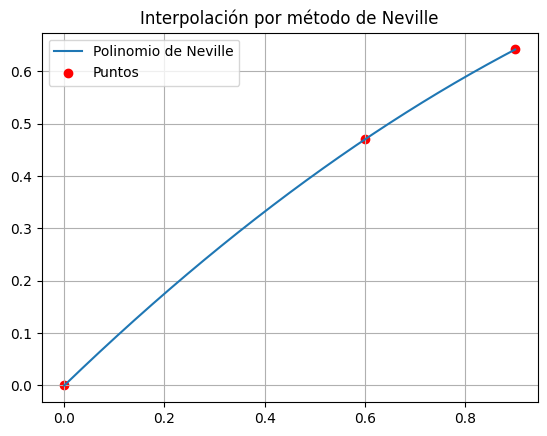

-0.234074074074074*x**2 + 0.923777777777778*x

In [4]:
a=[0,0.6,0.9]
b=[0,0.47,0.6418]
f=neville(a,b)
sp.expand(f)